# 07 - Integration and Differentiation (Daniel Teeuwsen)


#### Excercise 1
The file `velocities.txt` contains data of a particle's velocity in two columns. The first column is the time $t$ in seconds, and the second column is the velocity $v$ in meters/second. 

Write a program to read in the data and calculate the approximate distance traveled by the particle in the $x$ direction as a function of time. Do not just calculate the total distance traveled, calulate $x(t)$.

Use [`scipy.integrate.trapz`][1]. Plot both $v(t)$ and $x(t)$ in the same figure.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html

In [2]:
import scipy.integrate
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
myData=np.loadtxt("velocities.txt", usecols=(0,1), unpack=True, dtype=float)
print(f"The data file contains {myData.shape[0]} rows and  {myData.shape[1]} columns")


The data file contains 2 rows and  101 columns


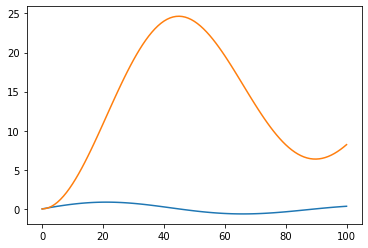

In [6]:
#print(scipy.integrate.trapz(myData[1]))

plt.plot(myData[0],myData[1]) #v(t)

distanceArray = np.empty(101,float)

for i in range(101):
    distanceArray[i] = scipy.integrate.trapz(myData[1,0:i+1])
#print(distanceArray)

plt.plot(myData[0],distanceArray)

#### Excercise 2

Extend the trapizoidal rule function I provided from the lecture notes to integrate the folowing function with **Simpson's rule** on 10 or more points.

$$I = \int^{2}_{0} (x^2-2x+1) \mathrm{d}x$$


Compare your results with what you obtain from using [`scipy.integrate.simps`][1] (scipy version 1.5.4 or earlier) or [`scipy.integrate.simpson`][2] (scipy version 1.6 forward) with the same number of points.

[1]: https://docs.scipy.org/doc/scipy-1.5.4/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html

Simpson's rule is given as: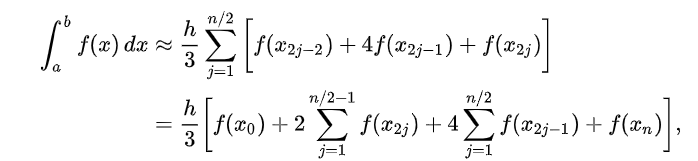

In [291]:
pointArray = np.arange(0,2.1,0.1) #21 values 0,0.1,0.2 ... 2 meaning 20 intervals

N = pointArray.size-1 #20 intervals

def integrand(x): #function
    return x**2-2*x+1

def mySimps(a,b,N):
    h = (b-a)/N
    mySum = integrand(a)+integrand(b) #first and last terms
    
    for i in range(1,int(N/2)): #even terms
        mySum = mySum + 2*integrand(2*i*h)
        
    for i in range(1,int(N/2)+1): #odd terms
        mySum = mySum + 4*integrand((2*i-1)*h)
        
    return (h/3)*mySum

print(mySimps(0,2,N))

print(scipy.integrate.simps(integrand(pointArray),pointArray))

0.6666666666666666
0.6666666666666666


#### Excercise 3
Consider the integral
$$I(x) = \int_{0}^{x} e^{-t^2}\ \mathrm{d}t$$

This is the [cumulative distribution function][1] of a normal distribution.

[1]: https://en.wikipedia.org/wiki/Cumulative_distribution_function

Use [`scipy.integrate.quad`][2], and in just a few lines of of code, make a plot of $I(x)$ as a function of $x$ from 0 to 3 in steps of 0.1. This means you need to compute the integral for each value of $x$.

[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

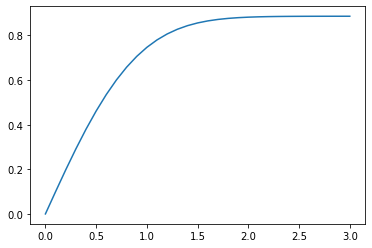

In [103]:
def cDistFunc(x):
    return np.exp(-x**2)

intValues = list()
errValues = list()

for i in np.arange(0,3.1,0.1):
    val,err = scipy.integrate.quad(cDistFunc,0,i)
    intValues.append(val)
    errValues.append(err)

plt.plot(np.arange(0,3.1,0.1),intValues)

#### Excercise 4

Use the `numpy.gradient` function to perform the derivative of $f(x)=e^{-ax}$ where $a=1.2$ over the range $x=(0,4)$. Plot $f(x)$, the numerically calculated $f'(x)$, and the actual $f'(x)$ on the same plot.

How many data points did you choose to sample $f(x)$? Does it make a difference in getting closer to the actual result?

Text(1.5, -1, "f'(x) gradient")

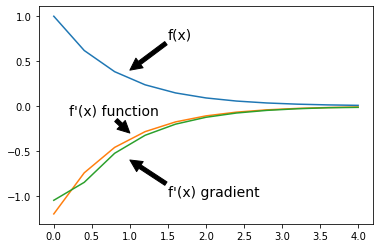

In [157]:
def f1(x,a):    #f(x)
    return np.exp(-a*x)

def f1Prime(x,a):  #f'(x)
    return -a*np.exp(-a*x)

a=1.2
numPoints = 11
xRangeArray = np.linspace(0,4,numPoints)

#print(np.gradient(f1(xRangeArray,a),4/numPoints))
#print('\n')
#print(f1Prime(xRangeArray,a))

plt.plot(xRangeArray,f1(xRangeArray,a))
plt.plot(xRangeArray,f1Prime(xRangeArray,a))
plt.plot(xRangeArray,np.gradient(f1(xRangeArray,a),4/numPoints))

plt.annotate("f(x)", fontsize=14, xy=(1,0.4), xytext=(1.5,0.75), arrowprops=dict(facecolor='black'))
plt.annotate("f'(x) function", fontsize=14, xy=(1,-0.3), xytext=(0.2,-0.1), arrowprops=dict(facecolor='black'))
plt.annotate("f'(x) gradient", fontsize=14, xy=(1,-0.6), xytext=(1.5,-1), arrowprops=dict(facecolor='black'))

I chose 11 data points with which to plot with. By increasing the number of points to say 111 (numPoints=111) the derivative calculated with the function and the derivative calculated with the gradient become much closer (orange and green lines almost coincide). Yes the number of data points chosen is important for getting an accurate result.

#### Excercise 5
Use the [`scipy.misc.derivative`][1] function to perform the derivative of $f(x)=e^{-ax^2}$ where $a=1.2$ over the range $x=(0,4)$. Plot $f(x)$, the numerically calculated $f'(x)$, and the actual $f'(x)$ on the same plot.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

<div class="alert alert-block alert-info">
<b>Tip:</b> When using <tt>numpy.linspace</tt> to set up the $x$ axis points, where $f'(x)$ will be calculated, use the <tt>retstep=True</tt> option. This will return the step size of the $x$-axis array, which is needed in <tt>scipy.misc.derivative</tt>.
</div>

Text(1.7, -0.75, '2 derivatives coincide')

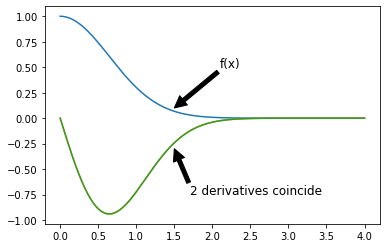

In [292]:
a=1.2

def f2(x):    #f(x)
    return np.exp(-a*x**2)

def f2Prime(x):  #f'(x)
    return -2*a*x*np.exp(-a*x**2)

numPoints = 201
xRangeArray = np.linspace(0,4,numPoints)


plt.plot(xRangeArray,f2(xRangeArray))
plt.plot(xRangeArray,f2Prime(xRangeArray))
plt.plot(xRangeArray,scipy.misc.derivative(f2,xRangeArray,dx=1e-6))

plt.annotate("f(x)", fontsize=12, xy=(1.5,0.1), xytext=(2.1,0.5), arrowprops=dict(facecolor='black'))
plt.annotate("2 derivatives coincide", fontsize=12, xy=(1.5,-0.3), xytext=(1.7,-0.75), arrowprops=dict(facecolor='black'))

#### Excercise 6
Use Equation 3.4.23 of the [NIST Digital Library][1] to program a second order derivative of any third-order polynomial over a range of positive $x$. 

<div class="alert alert-block alert-info">
    <b>Tip:</b> Lets build from the <tt>derivative</tt> function we designed during lecture, replacing the central difference formula for the <it>first</it> derivative, with the <it>second</it> derivative formula from the Handbook.
</div>

Create a function $ax^3+bx^2+cx+d$, where $a=-4,b=3,c=25,d=6$. Plot the funciton over a the range $x=(-3,3.5)$, where you can see the curves of the function, and plot the analytical second derivative over the same range. Finally add to that a plot the numerical deriviative.

Here is some pseudocode to help:
```python
# Take the second derivative of function f at point x.
# Use a default stepsize of h=0.01
def second_derivative(func,x,h=0.01) :
    temp = # the function from the NIST library 
    ...
    return temp
```
Use this function as we did in lecture. If you have points `x` and a function `f(x)`, then you can use your second derivative function to get the second derivative $y''=d^2f/dx^2$ this way:
```python
def f(x):
    ...
    
#
x = numpy.linspace(...)
y = f(x) 
ypp=second_derivative(f,x)
```

[1]: https://dlmf.nist.gov/3.4

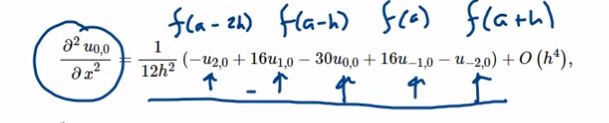

[ 78.          72.62068966  67.24137931  61.86206897  56.48275862
  51.10344828  45.72413793  40.34482759  34.96551724  29.5862069
  24.20689655  18.82758621  13.44827586   8.06896552   2.68965517
  -2.68965517  -8.06896552 -13.44827586 -18.82758621 -24.20689655
 -29.5862069  -34.96551724 -40.34482759 -45.72413793 -51.10344828
 -56.48275862 -61.86206897 -67.24137931 -72.62068966 -78.        ]
[ 78.          72.62068965  67.24137931  61.86206897  56.48275862
  51.10344828  45.72413793  40.34482759  34.96551724  29.5862069
  24.20689655  18.82758621  13.44827586   8.06896552   2.68965517
  -2.68965517  -8.06896552 -13.44827586 -18.82758621 -24.20689655
 -29.5862069  -34.96551724 -40.34482759 -45.72413793 -51.10344828
 -56.48275862 -61.86206897 -67.24137931 -72.62068965 -78.        ]


Text(0, -75, '2 derivatives coincide')

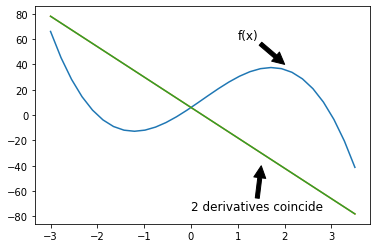

In [315]:
def f3(x):  #function
    a = -4
    b =  3
    c =  25
    d =  6
    return a*x**3+b*x**2+c*x+d

def f3DoublePrime(x): #Analytic derivative
    a=-4
    b=3
    return 6*a*x+2*b

def fDoublePrime(func,x,h=0.01): #Numerical Derivative
    return (1/(12*h**2))*(-func(x-2*h)+16*func(x-h)-30*func(x)+16*func(x+h)-func(x+2*h))

numPoints2 = 30
xRangeArray2 = np.linspace(-3,3.5,numPoints2)

plt.plot(xRangeArray2,f3(xRangeArray2))
plt.plot(xRangeArray2,f3DoublePrime(xRangeArray2))
plt.plot(xRangeArray2,fDoublePrime(f3,xRangeArray2,h=0.01))

plt.annotate("f(x)", fontsize=12, xy=(2,40), xytext=(1,60), arrowprops=dict(facecolor='black'))
plt.annotate("2 derivatives coincide", fontsize=12, xy=(1.5,-40), xytext=(0,-75), arrowprops=dict(facecolor='black'))

print(f3DoublePrime(xRangeArray2))  #Shows that the values are almost identical
print(fDoublePrime(f3,xRangeArray2,h=0.01)) 